In [172]:
# 모듈로딩

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import myFuncLib.mygraph as mygraph
import myFuncLib.myml as myml
import myFuncLib.myfunc as myfunc
from sklearn.inspection import permutation_importance
plt.rc('font', family='Malgun Gothic') # For Windows
%matplotlib inline

In [173]:
# 파일경로

FILE_PATH = './DATA/space/train.csv'
SpaceshipDF = pd.read_csv(FILE_PATH)
SpaceshipDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [174]:
SpaceshipDF.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [175]:
SpaceshipDF['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

- PassengerId- 각 승객에 대한 고유한 ID. 각 ID는 승객이 함께 여행하는 그룹을 나타내는 형식을 취하며, gggg_pp그룹 내의 번호입니다. 그룹에 속한 사람들은 종종 가족이지만 항상 그런 것은 아닙니다.ggggpp
- HomePlanet- 승객이 출발한 행성, 일반적으로 영주권이 있는 행성입니다.
- CryoSleep- 승객이 항해 기간 동안 정지된 애니메이션 상태에 들어가도록 선택했는지 여부를 나타냅니다. 냉동 수면 상태의 승객은 객실에 갇힙니다.
- Cabin- 승객이 머물고 있는 객실 번호. 형식을 취하며 deck/num/side, 여기서는 Port 또는 Starboard 중 하나 를side 사용할 수 있습니다 .PS
- Destination- 승객이 하선할 행성.
- Age- 승객의 나이.
- VIP- 승객이 항해 중 특별 VIP 서비스에 대한 비용을 지불했는지 여부.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck- 승객이 타이타닉호의 다양한 고급 편의시설에 대해 청구한 금액입니다.
- Name- 승객의 성과 이름.
- Transported- 승객이 다른 차원으로 이동했는지 여부. 이것이 타겟이고, 당신이 예측하려는 열입니다.

In [176]:
# 중복값 체크
SpaceshipDF.duplicated().sum()

0

In [177]:
# NAN 체크
SpaceshipDF.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [178]:
# 전부 중복인 값, 한개라도 중복인값 체크
# 대부분 각 컬럼별 결측치, 삭제아닌 최대한 채우기로 결정
SpaceshipDF.isna().all(axis=1).sum(), SpaceshipDF.isna().any(axis=1).sum()

(0, 2087)

In [179]:
# 모든 금액이 결측치인 데이터 체크 없으므로 개인별 총 지불한 금액 평균치를 대입하기로 결정
space_cols =SpaceshipDF.columns[[7,8,9,10,11]].to_list()
SpaceshipDF[space_cols].isna().all(axis=1).sum()

0

In [180]:
# 개인별 지불한 금액 평균치로 지정 대입
for col in space_cols:
    pId = SpaceshipDF.loc[SpaceshipDF[col].isna(),'PassengerId']
    for idx in pId:
        p = SpaceshipDF['PassengerId'] == idx
        SpaceshipDF.loc[p,col] = SpaceshipDF.loc[p,space_cols].mean(axis=1)
        print(SpaceshipDF.loc[p,col])

25    0.0
Name: RoomService, dtype: float64
35    685.0
Name: RoomService, dtype: float64
83    0.0
Name: RoomService, dtype: float64
132    24.25
Name: RoomService, dtype: float64
170    270.0
Name: RoomService, dtype: float64
220    222.0
Name: RoomService, dtype: float64
233    0.0
Name: RoomService, dtype: float64
280    1236.75
Name: RoomService, dtype: float64
319    473.5
Name: RoomService, dtype: float64
368    430.0
Name: RoomService, dtype: float64
400    0.0
Name: RoomService, dtype: float64
401    1918.5
Name: RoomService, dtype: float64
444    73.75
Name: RoomService, dtype: float64
448    83.0
Name: RoomService, dtype: float64
550    58.25
Name: RoomService, dtype: float64
568    196.75
Name: RoomService, dtype: float64
637    1776.0
Name: RoomService, dtype: float64
646    189.0
Name: RoomService, dtype: float64
820    663.25
Name: RoomService, dtype: float64
889    0.0
Name: RoomService, dtype: float64
905    10.0
Name: RoomService, dtype: float64
908    1.333333
Name: 

In [181]:
# colnames = ['HomePlanet','CryoSleep','Cabin','Destination']
# fig, ax = plt.subplots(ncols=2, nrows=2,figsize=(12,12))
# for idx, col in enumerate(colnames):
#     colSR = SpaceshipDF[col].value_counts()
#     myax = ax[idx // 2][idx % 2]
#     myax.pie(colSR.values, labels=list(colSR.index), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1.5} )
#     myax.set_title(f'{col} DATA PIE')
# plt.legend()
# plt.show()

In [182]:
# 결측치가 데이터의 2% 정도이기에 만약 최빈값이 1000개가 넘어간다면 최빈값으로 치환
def mode_fill(colname):
    mod_d = SpaceshipDF[colname].mode().values[0]
    mod_cnt = SpaceshipDF.loc[SpaceshipDF[colname] == mod_d,colname].count()
    if int(mod_cnt) > 1000:
        print(colname,': 최빈값으로 치환 개꿀')
        SpaceshipDF[colname].fillna(mod_d,inplace=True)
    else:
        print(colname,': 치환안됨')
    print(f'최빈값 개수:{mod_cnt}, 최빈값: {mod_d}')
    print()
mode_fill('HomePlanet')
mode_fill('CryoSleep')
mode_fill('Cabin')
mode_fill('Destination')

HomePlanet : 최빈값으로 치환 개꿀
최빈값 개수:4602, 최빈값: Earth

CryoSleep : 최빈값으로 치환 개꿀
최빈값 개수:5439, 최빈값: False

Cabin : 치환안됨
최빈값 개수:8, 최빈값: G/734/S

Destination : 최빈값으로 치환 개꿀
최빈값 개수:5915, 최빈값: TRAPPIST-1e



In [183]:
# 최빈값 너무 작음 각데이터 연관성 찾힘힘든 8700개 데이터중 200개이기에 삭제 결정
SpaceshipDF['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [184]:
# 방에 대한 데이터 확인불가, 삭제
SpaceshipDF.drop(index=SpaceshipDF[SpaceshipDF['Cabin'].isna()].index,inplace=True)

<Axes: >

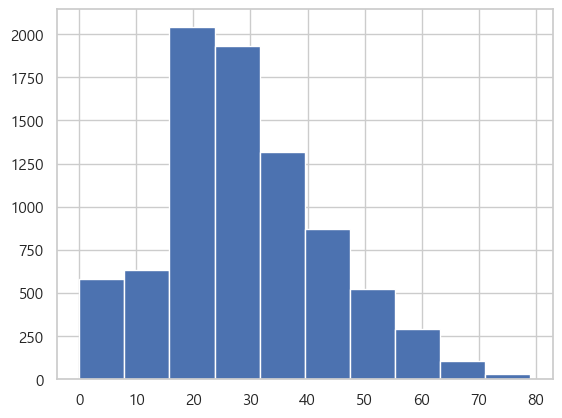

In [185]:
# 연령별 분포도 히스토그램, 딱히 문제없으므로 평균치대입
SpaceshipDF['Age'].hist()

In [186]:
# 나이 평균치 대입
SpaceshipDF.loc[SpaceshipDF['Age'].isna(),'Age'] = SpaceshipDF['Age'].mean()

In [187]:
# VIP 멤버들이 평균적으로 사용한 금액 추출
vipCut = SpaceshipDF.loc[SpaceshipDF['VIP'] == True,space_cols].mean(axis=1).mean()

In [188]:
vipidx = SpaceshipDF.loc[SpaceshipDF['VIP'].isna(),'PassengerId']
# VIP 멤버들이 평균적으로 사용한 금액이상으로 썻다면 VIP로 대입
for idx in vipidx:
    h_m = SpaceshipDF.loc[SpaceshipDF['PassengerId'] == idx,space_cols].mean(axis=1).values[0]
    if h_m >= vipCut:
        SpaceshipDF.loc[SpaceshipDF['PassengerId'] == idx,'VIP'] = True
    else:
        SpaceshipDF.loc[SpaceshipDF['PassengerId'] == idx,'VIP'] = False

In [189]:
# 결측치 체크
SpaceshipDF.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            198
Transported       0
dtype: int64

In [190]:
# 안쓰는 컬럼 삭제
SpaceshipDF.drop(columns='PassengerId',inplace=True)
SpaceshipDF.drop(columns='Name',inplace=True)

In [191]:
SpaceshipDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8494 non-null   object 
 1   CryoSleep     8494 non-null   bool   
 2   Cabin         8494 non-null   object 
 3   Destination   8494 non-null   object 
 4   Age           8494 non-null   float64
 5   VIP           8494 non-null   object 
 6   RoomService   8494 non-null   float64
 7   FoodCourt     8494 non-null   float64
 8   ShoppingMall  8494 non-null   float64
 9   Spa           8494 non-null   float64
 10  VRDeck        8494 non-null   float64
 11  Transported   8494 non-null   bool   
dtypes: bool(2), float64(6), object(4)
memory usage: 746.5+ KB


In [192]:
# object 타입 데이터 원-핫 인코딩
ex_featureDF = SpaceshipDF[SpaceshipDF.columns[:-1]]
targetSR = SpaceshipDF[SpaceshipDF.columns[-1]]

floatDF = ex_featureDF[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
objDF = ex_featureDF[['HomePlanet','CryoSleep','Destination','VIP']]

In [193]:
# 원-핫인코딩 - feature
objDF_ohe = pd.get_dummies(objDF, columns=objDF.columns)
objDF_ohe = objDF_ohe.applymap(lambda x: 1 if x is True else (0 if x is False else x))
objDF_ohe

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0,1,0,1,0,0,0,1,1,0
1,1,0,0,1,0,0,0,1,1,0
2,0,1,0,1,0,0,0,1,0,1
3,0,1,0,1,0,0,0,1,1,0
4,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
8688,0,1,0,1,0,1,0,0,0,1
8689,1,0,0,0,1,0,1,0,1,0
8690,1,0,0,1,0,0,0,1,1,0
8691,0,1,0,1,0,1,0,0,1,0


In [194]:
targetSR_ohe = targetSR.astype(int)
targetSR_ohe

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8494, dtype: int32

In [195]:
print(objDF_ohe.shape, floatDF.shape)
objDF_ohe.astype('float64')

(8494, 10) (8494, 6)


,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8689,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8691,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [196]:
# 인코딩 완
featureDF = pd.concat([floatDF,objDF_ohe],axis=1)
featureDF

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,1,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,1,0,0,0,1,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,1,0,1,0,0,1,0


In [197]:
myfunc.shape_view(featureDF, targetSR)

DF0 : [shape: (8494, 16)], [ndim: 2D]
DF1 : [shape: (8494,)], [ndim: 1D]


In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    stratify=targetSR,
                                                    test_size=0.2,
                                                    random_state=10)
myfunc.shape_view(X_train, X_test, Y_train, Y_test)

DF0 : [shape: (6795, 16)], [ndim: 2D]
DF1 : [shape: (1699, 16)], [ndim: 2D]
DF2 : [shape: (6795,)], [ndim: 1D]
DF3 : [shape: (1699,)], [ndim: 1D]


In [199]:
from sklearn.preprocessing import MinMaxScaler
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

# 스케일러에 데이터셋 전용에 속성값 설정
mmScaler.fit(X_train)
print('[스케일러 데이터]')
print(f'min: {mmScaler.min_}, '
    f'scale: {mmScaler.scale_}, '
    f'min: {mmScaler.data_min_}, '
    f'max: {mmScaler.data_max_}, ')

# 학습용, 테스트용 데이터셋 스케일링 진행
X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

[스케일러 데이터]
min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], scale: [1.26582278e-02 1.00806452e-04 3.35424144e-05 4.25676826e-05
 4.46269190e-05 4.14370364e-05 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00], min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], max: [7.9000e+01 9.9200e+03 2.9813e+04 2.3492e+04 2.2408e+04 2.4133e+04
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00], 


In [200]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [201]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [202]:
lr_model.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [203]:
from sklearn.model_selection import cross_val_score

In [204]:
print('X_train :',lr_model.score(X_train_scaled,Y_train))
print('X_test :',lr_model.score(X_test_scaled,Y_test))

X_train : 0.7711552612214864
X_test : 0.7698646262507357


In [205]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_preds = lr_model.predict(X_test_scaled)
lr_preds_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
train_score = cross_val_score(lr_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')
# accuracy와 roc_auc 측정
print(f'accuracy: {accuracy_score(Y_test,lr_preds):.3f}, roc_auc: {roc_auc_score(Y_test,lr_preds_proba):.3f}')

accuracy: 0.770, roc_auc: 0.860


In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score
def score_print(lr_model,Y_test,X_test_scaled):
    y_test_pred = lr_model.predict(X_test_scaled)
    y_test_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1] 
    accuracy = accuracy_score(Y_test, y_test_pred)
    precision = precision_score(Y_test, y_test_pred)
    recall = recall_score(Y_test, y_test_pred)
    f1 = f1_score(Y_test, y_test_pred)
    roc_auc = roc_auc_score(Y_test, y_test_pred_prob)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    return [accuracy,precision,recall,f1,roc_auc]

In [207]:
lists= []
lists.extend(['accuracy','precision','recall','f1,roc_auc'])

In [208]:
barDict = {}
barDict['score'] = score_print(lr_model,Y_train,X_train_scaled)
barDict['score'].extend(score_print(lr_model,Y_test,X_test_scaled))
barDict['score_name'] = ['accuracy','precision','recall','f1','roc_auc']*2
barDict['name'] = ['train']*5
barDict['name'].extend(['test']*5)

Accuracy: 0.77
Precision: 0.81
Recall: 0.71
F1-Score: 0.76
ROC-AUC: 0.86
Accuracy: 0.77
Precision: 0.79
Recall: 0.73
F1-Score: 0.76
ROC-AUC: 0.86


Text(0, 0.5, 'Score')

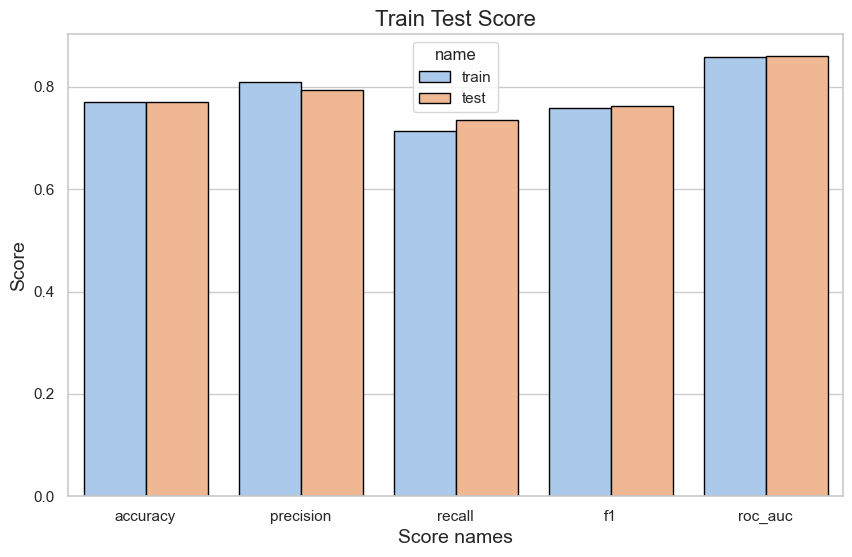

In [209]:
# 스타일 설정
sns.set_theme(style="whitegrid")  # 전체적인 스타일 설정
plt.figure(figsize=(10, 6))  # 플롯 크기 설정

# 바 플롯 그리기
barplot = sns.barplot(
    x='score_name', 
    y='score', 
    data=barDict, 
    hue='name',
    palette='pastel',  # 부드러운 색상 팔레트
    edgecolor='black'  # 바의 테두리 색상
)

# 플롯 타이틀과 라벨 설정
plt.title('Train Test Score', fontsize=16)
plt.xlabel('Score names', fontsize=14)
plt.ylabel('Score', fontsize=14)

In [210]:
lr_model.feature_names_in_.tolist()

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'CryoSleep_False',
 'CryoSleep_True',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'VIP_False',
 'VIP_True']

In [211]:
# 가중치 계산
weights = lr_model.coef_[0] * (X_train.max(axis=0) - X_train.min(axis=0)) / X_train.std(axis=0)

# 정렬
sorted_idx = weights.sort_values(ascending=False)
for idx,val in sorted_idx.items():
    print(f"{idx}: {val}")

ShoppingMall: 119.32514693704685
FoodCourt: 59.38247689098753
VIP_False: 1.0025138513451284
HomePlanet_Europa: 0.9450914213604356
CryoSleep_True: 0.8706551805035632
Destination_55 Cancri e: 0.30389443150144885
Destination_TRAPPIST-1e: -0.13603115185325798
HomePlanet_Mars: -0.16354164151202952
Destination_PSO J318.5-22: -0.2133428879448943
HomePlanet_Earth: -0.6797778148422637
CryoSleep_False: -0.8702807574791609
VIP_True: -1.0013280980575383
Age: -2.4032226173256737
RoomService: -64.54006806617576
Spa: -140.60000583246295
VRDeck: -145.606499898847


In [212]:
X_train_scaled2=X_train_scaled[sorted_idx.index[:6].to_list()]
X_test_scaled2=X_test_scaled[sorted_idx.index[:6].to_list()]

In [213]:
lr_model2 = LogisticRegression()

In [214]:
lr_model2.fit(X_train_scaled2,Y_train)

LogisticRegression()

In [215]:
print('X_train :',lr_model.score(X_train_scaled,Y_train))
print('X_test :',lr_model.score(X_test_scaled,Y_test))
print('X_train2 :',lr_model2.score(X_train_scaled2,Y_train))
print('X_test2 :',lr_model2.score(X_test_scaled2,Y_test))

X_train : 0.7711552612214864
X_test : 0.7698646262507357
X_train2 : 0.7268579838116261
X_test2 : 0.7257210123602119


In [216]:
# Permutation Importance 계산
x_col = X_test_scaled.columns
result = permutation_importance(lr_model, X_test_scaled, Y_test, n_repeats=10, random_state=10)

# 변수 중요도 출력
importance_dict = {}
importance = result.importances_mean
for i, val in enumerate(importance):
    importance_dict[x_col[i]] = val

In [217]:
importance_dict = dict(sorted(importance_dict.items(),key=lambda x:x[1], reverse=True))

In [268]:
from sklearn.preprocessing import StandardScaler

In [270]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [272]:
model = LogisticRegression()
model.fit(X_scaled, Y_train)

LogisticRegression()

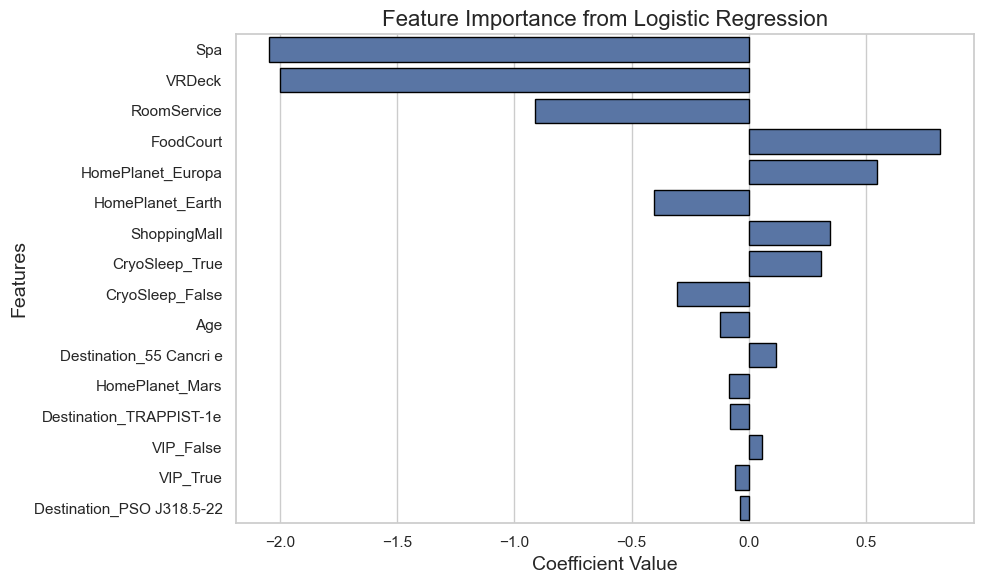

In [277]:
coefficients = model.coef_[0]

# 변수 중요도 데이터프레임 생성
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': coefficients
})

# 절대값을 기준으로 중요도 정렬
importance_df['Abs_Importance'] = np.abs(importance_df['Importance'])
importance_df = importance_df.sort_values(by='Abs_Importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df,
    edgecolor='black'
)
plt.title('Feature Importance from Logistic Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

In [278]:
imp_col_names = importance_df['Feature']

In [279]:
im_feature = []
for i in range(1,len(imp_col_names)-1):
    X_train_scaled3=X_train_scaled[imp_col_names[:-i]]
    X_test_scaled3=X_test_scaled[imp_col_names[:-i]]
    lr_model3 = LogisticRegression(max_iter=500)
    lr_model3.fit(X_train_scaled3,Y_train)
    train_score = cross_val_score(lr_model3, X_train_scaled3, Y_train, cv=5, scoring='accuracy')  # scoring 매개변수에 평가 지표 설정 가능
    test_score = cross_val_score(lr_model3, X_test_scaled3, Y_test, cv=5, scoring='accuracy')  # scoring 매개변수에 평가 지표 설정 가능
    im_feature.append([imp_col_names[:-i],train_score,test_score])

In [280]:
im_feature

[[4                         Spa
  5                      VRDeck
  1                 RoomService
  2                   FoodCourt
  7           HomePlanet_Europa
  6            HomePlanet_Earth
  3                ShoppingMall
  10             CryoSleep_True
  9             CryoSleep_False
  0                         Age
  11    Destination_55 Cancri e
  8             HomePlanet_Mars
  13    Destination_TRAPPIST-1e
  14                  VIP_False
  15                   VIP_True
  Name: Feature, dtype: object,
  array([0.76600442, 0.74319352, 0.78072112, 0.74392936, 0.7718911 ]),
  array([0.73823529, 0.73823529, 0.74705882, 0.76764706, 0.77876106])],
 [4                         Spa
  5                      VRDeck
  1                 RoomService
  2                   FoodCourt
  7           HomePlanet_Europa
  6            HomePlanet_Earth
  3                ShoppingMall
  10             CryoSleep_True
  9             CryoSleep_False
  0                         Age
  11    Destination_55 Ca

In [281]:
im_feature = sorted(im_feature, key=lambda x:x[1].mean() + x[2].mean(),reverse=True)

In [282]:
X_train_scaled2 = X_train_scaled[im_feature[0][0]].copy()
X_test_scaled2 = X_test_scaled[im_feature[0][0]].copy()

In [283]:
X_train_scaled2

,Spa,VRDeck,RoomService,FoodCourt,HomePlanet_Europa,HomePlanet_Earth,ShoppingMall,CryoSleep_True,CryoSleep_False,Age
0,0.004641,0.000000,0.064516,0.000000,0.0,1.0,0.006130,0.0,1.0,0.265823
1,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.034054,0.0,1.0,0.341772
2,0.000000,0.028219,0.000202,0.000000,0.0,1.0,0.000000,0.0,1.0,0.215190
3,0.219832,0.000041,0.000101,0.000000,0.0,1.0,0.000000,0.0,1.0,0.253165
4,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.036055,0.0,1.0,0.253165
...,...,...,...,...,...,...,...,...,...,...
6790,0.000000,0.026022,0.000000,0.000000,0.0,1.0,0.000000,0.0,1.0,0.518987
6791,0.000045,0.000000,0.000101,0.047295,0.0,1.0,0.000000,0.0,1.0,0.455696
6792,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.481013
6793,0.009282,0.031244,0.000000,0.000000,0.0,1.0,0.000000,0.0,1.0,0.189873


In [284]:
for im in im_feature:
    print(im[0])
    print('X_train :',im[1])
    print('X_test :',im[2])
    print()

4                   Spa
5                VRDeck
1           RoomService
2             FoodCourt
7     HomePlanet_Europa
6      HomePlanet_Earth
3          ShoppingMall
10       CryoSleep_True
9       CryoSleep_False
0                   Age
Name: Feature, dtype: object
X_train : [0.76306107 0.74319352 0.78072112 0.74319352 0.77851361]
X_test : [0.74411765 0.74117647 0.75       0.77647059 0.77581121]

4                         Spa
5                      VRDeck
1                 RoomService
2                   FoodCourt
7           HomePlanet_Europa
6            HomePlanet_Earth
3                ShoppingMall
10             CryoSleep_True
9             CryoSleep_False
0                         Age
11    Destination_55 Cancri e
8             HomePlanet_Mars
13    Destination_TRAPPIST-1e
Name: Feature, dtype: object
X_train : [0.76453274 0.74319352 0.78072112 0.74466519 0.7740986 ]
X_test : [0.73823529 0.73529412 0.75       0.77058824 0.77876106]

4                         Spa
5             

In [285]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'logreg__solver': ['liblinear', 'saga', 'lbfgs'],
    'logreg__l1_ratio': [0.1, 0.5, 0.7, 1]  # elasticnet 일 때만 사용됨
}

# GridSearchCV 설정 및 실행
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled2, Y_train)

# 최적의 파라미터와 성능
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Best parameters found:  {'logreg__C': 1, 'logreg__l1_ratio': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best cross-validation accuracy: 0.79


c:\Users\KDP-38\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KDP-38\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KDP-38\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\KDP-38\anaconda3\envs\ML_38\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.f

In [286]:
lr_model2 = grid_search.best_estimator_

In [287]:
score_print(lr_model2, Y_train,X_train_scaled2)
print()
score_print(lr_model, Y_train,X_train_scaled)
print()
# score_print(Y_test,X_test_scaled2)

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-Score: 0.79
ROC-AUC: 0.87

Accuracy: 0.77
Precision: 0.81
Recall: 0.71
F1-Score: 0.76
ROC-AUC: 0.86



Accuracy: 0.77
Precision: 0.79
Recall: 0.73
F1-Score: 0.76
ROC-AUC: 0.86
Accuracy: 0.79
Precision: 0.78
Recall: 0.81
F1-Score: 0.80
ROC-AUC: 0.87


Text(0, 0.5, 'Score')

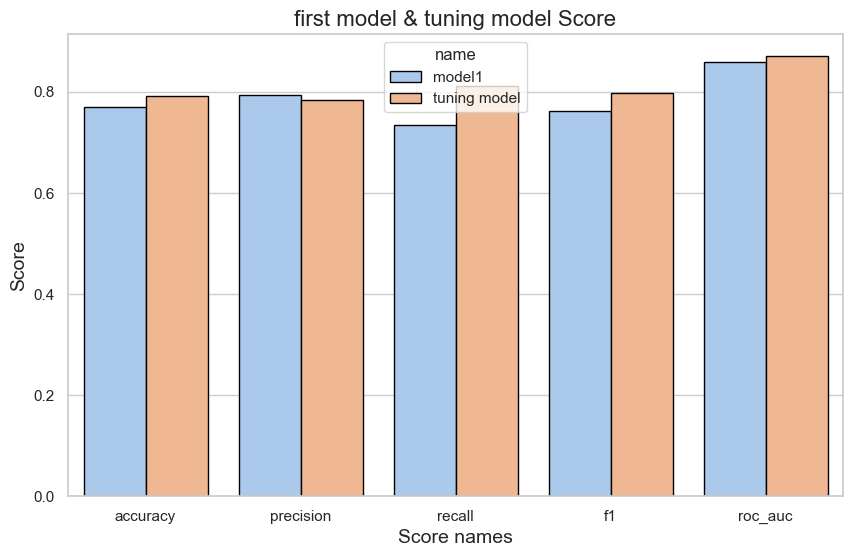

In [288]:
barDict = {}
barDict['score'] = score_print(lr_model,Y_test,X_test_scaled)
barDict['score'].extend(score_print(lr_model2,Y_test,X_test_scaled2))
barDict['score_name'] = ['accuracy','precision','recall','f1','roc_auc']*2
barDict['name'] = ['model1']*5
barDict['name'].extend(['tuning model']*5)

# 스타일 설정
sns.set_theme(style="whitegrid")  # 전체적인 스타일 설정
plt.figure(figsize=(10, 6))  # 플롯 크기 설정

# 바 플롯 그리기
barplot = sns.barplot(
    x='score_name', 
    y='score', 
    data=barDict, 
    hue='name',
    palette='pastel',  # 부드러운 색상 팔레트
    edgecolor='black'  # 바의 테두리 색상
)

# 플롯 타이틀과 라벨 설정
plt.title('first model & tuning model Score', fontsize=16)
plt.xlabel('Score names', fontsize=14)
plt.ylabel('Score', fontsize=14)

In [289]:
f1_model_score_mean = np.array(list(barDict.values())[0][:5]).mean()
tuning_model_score_mean = np.array(list(barDict.values())[0][5:]).mean()

In [290]:
print(f'첫번째 모델 평균점수: {f1_model_score_mean}')
print(f'튜닝모델 평균점수: {tuning_model_score_mean}')

tuning_model_score_mean - f1_model_score_mean

첫번째 모델 평균점수: 0.7840855686731117
튜닝모델 평균점수: 0.8105612477729002


0.02647567909978843

In [ ]:
lr_model

In [295]:
from sklearn.metrics import classification_report

y_pre = lr_model2.predict(X_test_scaled2)
print(classification_report(Y_test,y_pre))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79       843
        True       0.78      0.81      0.80       856

    accuracy                           0.79      1699
   macro avg       0.79      0.79      0.79      1699
weighted avg       0.79      0.79      0.79      1699

